# Data Modeling - Classification - Exercise #3
In this exercise you will get some hands-on experience with applying SVM to classification problems. You will also practice with using kernels to achieve linear separability in a higher dimension, to better understand how SVM can be used for nonlinear classification.

## Part 1: Loading Data and Linear SVM

**Questions:**

1. Load the data from `svm_data.csv` into a Pandas DataFrame. There are three datasets with target `y`. How many rows are in each dataset? What are the independent variables (features) in the dataset? What values can the target take?
2. Display a scatterplot for each dataset (1-3) SEPARATELY. The independent variables should be the x and y values, and the target should be reflected as the color of the points. Include titles and legends/colorbars. Hint: Use Matplotlib/Pandas `scatter(..., c=...)`.
3. Which (if any) if datasets 1-3 are linearly separable?
4. For each of datasets 1-3, do the following:
  * Create a linear SVM classification model with `sklearn.svm.LinearSVC`
  * Train the model to predict the target `y` using input features `x1` and `x2`
  * Report the **train set accuracy** of your classifier (we are using all the data as training data)
5. Explain how your results in the previous question relate to your answer to question 3.

In [1]:
import pandas as pd
# 1
df = pd.read_csv("svm_data.csv")

display(df['dataset'].value_counts())

features = df.drop(['y','dataset'], axis=1)
print("\nIndependent variables (features):")
print(features.head())

print("\nValues the target can take:")
print(df['y'].unique())


dataset
1    100
2    100
3    100
Name: count, dtype: int64


Independent variables (features):
         x1        x2
0  0.488135  1.778165
1  2.151894 -2.299920
2  1.027634  2.351940
3  0.448832  4.621885
4 -0.763452 -2.512469

Values the target can take:
[-1  1]


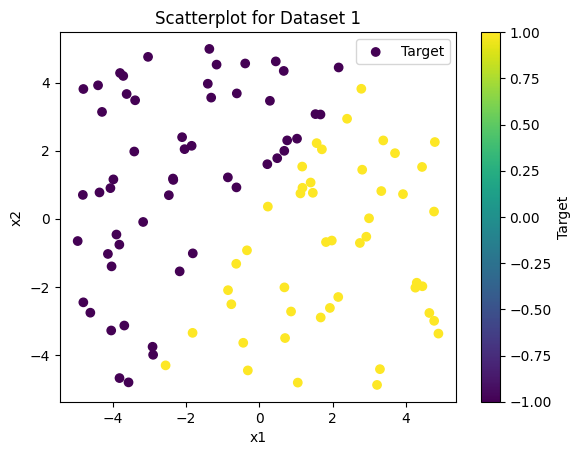

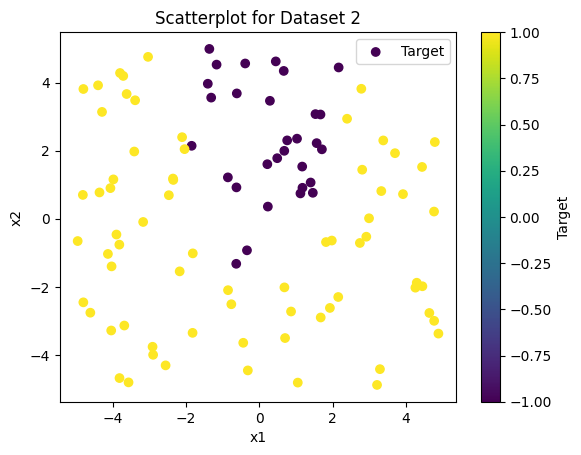

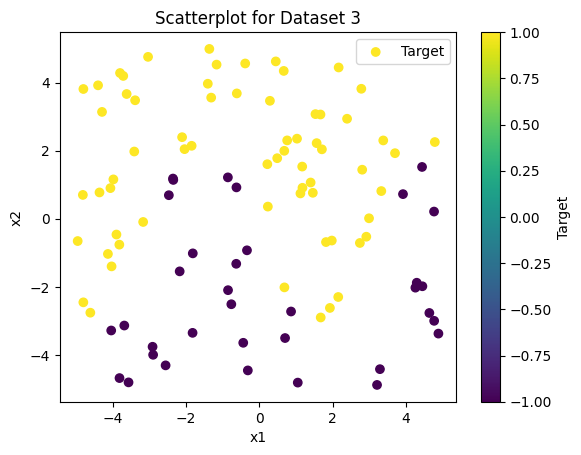

In [2]:
# 2
import matplotlib.pyplot as plt

datasets = df['dataset'].unique()

for dataset_num in datasets:
    dataset_df = df[df['dataset'] == dataset_num]
    plt.scatter(x=dataset_df['x1'], y=dataset_df['x2'], c=dataset_df['y'], cmap='viridis', label='Target')
    plt.title(f'Scatterplot for Dataset {dataset_num}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.colorbar(label='Target')
    plt.show()


3. We can see that the first dataset is linearly separable.

In [3]:
# 4
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

datasets = df['dataset'].unique()

for dataset_num in datasets:
    dataset_df = df[df['dataset'] == dataset_num]
    X = dataset_df[['x1', 'x2']]
    y = dataset_df['y']
    model = LinearSVC(dual=False)
    model.fit(X, y)
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    print(f'Dataset {dataset_num} - Training Set Accuracy: {accuracy:.2%}')


Dataset 1 - Training Set Accuracy: 100.00%
Dataset 2 - Training Set Accuracy: 77.00%
Dataset 3 - Training Set Accuracy: 83.00%


5. A 100% accuracy on the training set means that the Linear SVM model successfully distinguished between the two groups (with target values -1 and 1). This matches what we observed in the scatterplot, indicating that the data is likely linearly separable.

## Part 2: The "Kernel Trick"

**Questions:**

6. Show that the data $x=(x_1,x_2)\in\mathbb{R}^2$ from dataset 2 was labelled using the function

$$
y = \text{sign}(x_1^2 - x_2 - 2)
$$

Note: The **sign function** is defined as $\text{sign}(x) = \begin{cases} -1 & x < 0 \\ 0 & x = 0 \\ 1 & x > 0 \end{cases}$.

7. Use a polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find vector $w \in \mathbb{R}^5$ and scalar $b \in \mathbb{R}$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(x_1, x_2, x_1^2, x_2^2, x_1x_2)
$$

  Note that the solution is SIMPLE and involves comparing the known label y with the equation of the hyperplane. Considering the definition of $\phi(x)$ the solution is quite straightforward - no need to use fancy math.


8. Show that the data $x=(x_1,x_2)\in\mathbb{R}^2$ from dataset 3 was labelled using the function
$$
y = \text{sign}(5\sin(x_1) + 2 x_2 + 1)
$$

9. Similarly to question 7, find the separating hyperplane for dataset 3 in the higher dimensional space defined by

$$\phi(x) = \phi(x_1, x_2) = (x_1, x_2, \cos(x_1), \sin(x_1), \cos(x_2), \sin(x_2))$$

In [4]:
# 6
import numpy as np

def compute_labels(x1, x2):
    return np.sign(x1**2 - x2 - 2)

df['computed_labels'] = compute_labels(df['x1'], df['x2'])
comparison_dataset2 = df[df['dataset'] == 2][['y', 'computed_labels']]
all_equal = (comparison_dataset2['y'] == comparison_dataset2['computed_labels']).all()
print(f'All compute_labels and y in dataset 2 are equal: {all_equal}')

All compute_labels and y in dataset 2 are equal: True


7. We want
$$
x_1^2 - x_2 - 2 = w^T\phi(x)+b
$$ So we will chose w = (0,1,1,0,0) and b = -2


In [5]:
import numpy as np

w = np.array([0, -1, 1, 0, 0])
b = -2

df['phi_x1'] = df['x1']
df['phi_x2'] = df['x2']
df['phi_x1^2'] = df['x1']**2
df['phi_x2^2'] = df['x2']**2
df['phi_x1x2'] = df['x1'] * df['x2']

df['y2'] = np.sign(w[0]*df['phi_x1'] + w[1]*df['phi_x2'] + w[2]*df['phi_x1^2'] + w[3]*df['phi_x2^2'] + w[4]*df['phi_x1x2'] + b)

dataset2_check = df['dataset'] == 2
all_equal_dataset2 = (df['y'] == df['y2'])[dataset2_check]

print(all_equal_dataset2.all())
df2 = df[df['dataset'] == 2].copy()

True


In [6]:
# 8
def compute_labels(x1, x2):
    return np.sign(5 * np.sin(x1) + 2 * x2 + 1)

df['computed_labels'] = compute_labels(df['x1'], df['x2'])
comparison_dataset3 = df[df['dataset'] == 3][['y', 'computed_labels']]
all_equal_dataset3 = (comparison_dataset3['y'] == comparison_dataset3['computed_labels']).all()

print(f'All computed_labels and y in dataset 3 are equal: {all_equal_dataset3}')


All computed_labels and y in dataset 3 are equal: True


9. we want 
$$
5\sin(x_1) + 2 x_2 + 1 = w^T\phi(x)+b
$$
So we will chose w = (0, 2, 0, 1, 0 ,0) and b = 1

In [7]:
w = np.array([0, 2, 0, 5, 0, 0])
b = 1

df['phi_x1'] = df['x1']
df['phi_x2'] = df['x2']
df['phi_cos_x1'] = np.cos(df['x1'])
df['phi_sin_x1'] = np.sin(df['x1'])
df['phi_cos_x2'] = np.cos(df['x2'])
df['phi_sin_x2'] = np.sin(df['x2'])

df['y3'] = np.sign(w[0]*df['phi_x1'] + w[1]*df['phi_x2'] + w[2]*df['phi_cos_x1'] + w[3]*df['phi_sin_x1'] + w[4]*df['phi_cos_x2'] + w[5]*df['phi_sin_x2'] + b)

dataset2_check = df['dataset'] == 3
all_equal_dataset2 = (df['y'] == df['y3'])[dataset2_check]

print(all_equal_dataset2.all())
df3 = df[df['dataset'] == 3].copy()

True


## Part 3: RBF Kernel and Support Vectors

Using the results above, we know that all three datasets have a separating hyperplane in a higher dimensional space.

In this part, we will use an SVM classifier with the **Radial Basis Function (RBF) Kernel)** on each dataset. We will see how this lets us learn a nonlinear classifier in the original feature space, and also examine its support vectors.

**Questions:**

10. Repeat question 4 but instead using `sklearn.svm.SVC(...)` with a RBF kernel (this is the default kernel used, see the `kernel=` argument in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)). Use parameter `C=100` so that it is (nearly) hard-margin SVM. Briefly explain your results.

question 4 : 
For each of datasets 1-3, do the following:
  * Create a linear SVM classification model with `sklearn.svm.LinearSVC`
  * Train the model to predict the target `y` using input features `x1` and `x2`
  * Report the **train set accuracy** of your classifier (we are using all the data as training data)

11. Repeat the previous question but instead using parameter `C=1` (soft-margin SVM). Briefly explain the difference in results.

12. Use the provided `plot_svm_results(...)` function to plot the results of the models from questions 10 and 11 **trained and evaluated on dataset 3**. Explain how you can see the results of the previous two questions in the plots.

13. The support vectors of your model are displayed with 'x' markers. Try training hard-margin (`C=100`) SVM with RBF kernel on **the first 10 samples of dataset 3** and plot the results. How does the number of support vectors change? What about the percentage of the samples that are support vectors? Give an explanation for your observations.



In [8]:
# 10
from sklearn.svm import SVC
datasets = df['dataset'].unique()

for dataset_num in datasets:
    dataset_df = df[df['dataset'] == dataset_num]
    X = dataset_df[['x1', 'x2']]
    y = dataset_df['y']
    model = SVC(C=100)
    model.fit(X, y)
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    print(f'Dataset {dataset_num} - Training Set Accuracy: {accuracy:.2%}')

Dataset 1 - Training Set Accuracy: 100.00%
Dataset 2 - Training Set Accuracy: 100.00%
Dataset 3 - Training Set Accuracy: 100.00%


We can see that now, we arrived at a perfect accuracy for every set.
A higher C in SVM (with C=100) enforces a strict classification, aiming for a perfect fit to training data, suitable when data is cleanly separable. 

In [9]:
# 11
from sklearn.svm import SVC
datasets = df['dataset'].unique()

for dataset_num in datasets:
    dataset_df = df[df['dataset'] == dataset_num]
    X = dataset_df[['x1', 'x2']]
    y = dataset_df['y']
    model = SVC(C=1)
    model.fit(X, y)
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    print(f'Dataset {dataset_num} - Training Set Accuracy: {accuracy:.2%}')

Dataset 1 - Training Set Accuracy: 98.00%
Dataset 2 - Training Set Accuracy: 97.00%
Dataset 3 - Training Set Accuracy: 90.00%


A lower C (C=1) allows some misclassifications for a more flexible model, fitting well when data has noise or isn't perfectly separable, leading to high but not necessarily 100% accuracy on the training set. 

In [10]:
### CODE FOR QUESTIONS 12-13 ###

def plot_svm_results(model, X, y):
  """
  Plot results of an SVM model, where 'model' is a trained sklearn SVM model
  (SVC(...) with .fit(...) already applied), and X and y are NumPy arrays of
  input and target data respectively.
  """
  assert type(X) is np.ndarray
  assert type(y) is np.ndarray
  x_min, x_max = -5, 5
  y_min, y_max = -5, 5
  steps = 100
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, steps),
      np.linspace(y_min, y_max, steps)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.figure()
  plt.contourf(xx, yy, Z, cmap='jet', alpha=0.2)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', label='non support vector')
  plt.scatter(X[model.support_, 0], X[model.support_, 1], c=y[model.support_],
              s=100, marker='X', cmap='jet', label='support vector')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.title(f'SVM with RBF kernel; {len(model.support_)} support vectors')
  plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


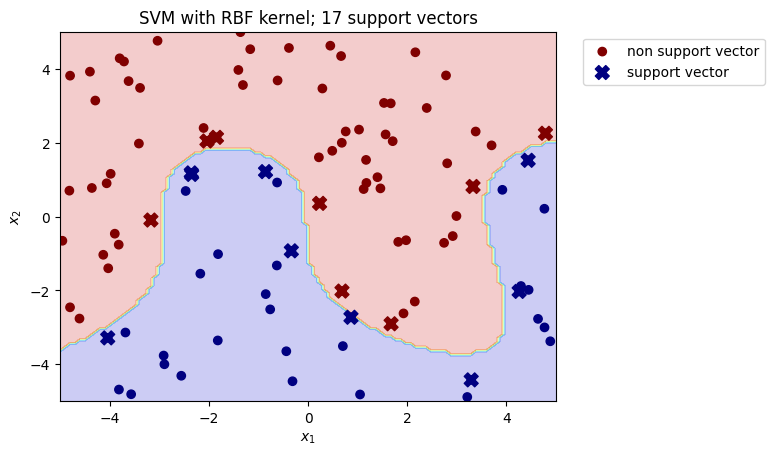

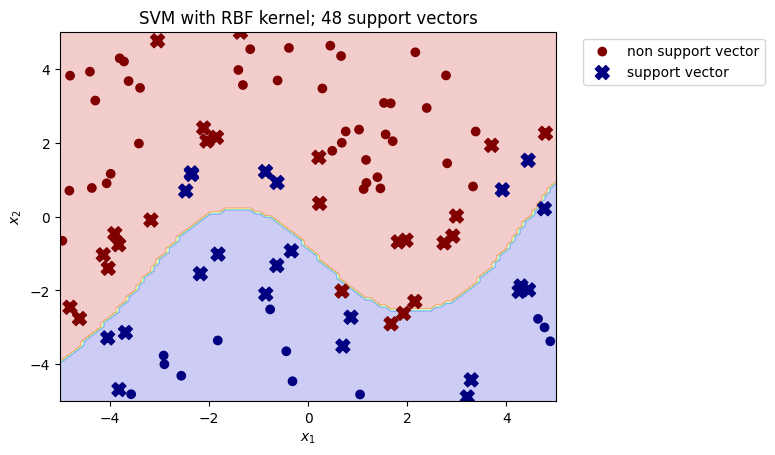

In [11]:
# 12

X3 = df3[['x1', 'x2']].values
y3 = df3['y'].values

# for C = 100

model = SVC(C=100)
model.fit(df3[['x1', 'x2']], df3['y'])
plot_svm_results(model, X3, y3)

# for C = 1
model = SVC(C=1)
model.fit(df3[['x1', 'x2']], df3['y'])
plot_svm_results(model, X3, y3)

For C=100 (Hard-Margin), the plot shows a rigid decision boundary aiming for perfect classification, with fewer support vectors. For C=1 (Soft-Margin), the plot suggests a more flecxible boundary, allowing for misclassifications, and exhibits a wider margin with more support vectors(48% against 17% for Hard-Margin). 

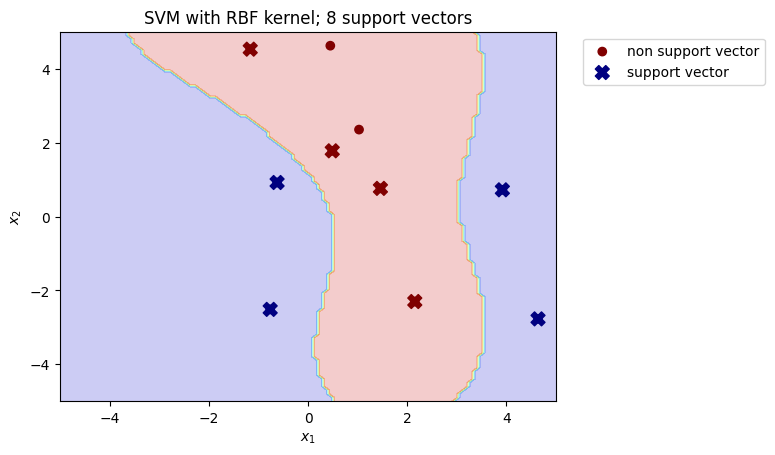

In [12]:
# 13
model = SVC(kernel='rbf', C=100).fit(X3[:10], y3[:10])
plot_svm_results(model, X3[:10], y3[:10])

We can see that now that we took only 10% of the dataset, we have 80% of support vectors but when we took the whole dataset we had only 17% of support vectors.
When using a small subset (10%) of the dataset, the SVM model with C=100 is more prone to adapting to noise or individual data points, resulting in a higher percentage (80%) of support vectors. In contrast, with the entire dataset, the model generalizes better and relies on a better understanding of the data, leading to a lower percentage (17%) of support vectors. 